In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('/Users/cd8607/Documents/Lammps_MD/', 'git_folder', 'Classes'))
import EAM_Fitting_Serial
import Handle_PotFiles
import Handle_PotFiles_FS, Handle_PotFiles_He
import time
import glob
from scipy.optimize import minimize
os.chdir('/Users/cd8607/Documents/Lammps_MD')
from scipy.integrate import simpson

In [2]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('git_folder/Potentials/WHHe_test.eam.alloy')

print(pot.keys())

keys = [
        'W F' , 'W-W p' , 'W-H p' , 'W-He p' ,
        'H F' , 'H-W p' , 'H-H p' , 'H-He p' ,
        'He F', 'He-W p', 'He-H p', 'He-He p',
        'W-W' , 'W-H'   , 'W-He'  , 'H-H'    ,'H-He' , 'He-He'
        ] 

pot_fs = {}

for element in ['W', 'H', 'He']:

    pot_fs[element + ' F'] = pot[element + '_F']
    pot_fs[element + '-W p'] = pot[element + '_p']
    pot_fs[element + '-H p'] = pot[element + '_p']
    pot_fs[element + '-He p'] = pot[element + '_p']

for key in ['W-W' , 'W-H'   , 'W-He'  , 'H-H', 'H-He'   , 'He-He']:
    pot_fs[key] = pot[key]

print(pot_fs.keys())
Handle_PotFiles_FS.write_pot(pot_fs, potlines, 'git_folder/Potentials/beck_full.eam.fs')

dict_keys(['W_F', 'W_p', 'H_F', 'H_p', 'He_F', 'He_p', 'W-W', 'W-H', 'H-H', 'W-He', 'H-He', 'He-He'])
dict_keys(['W F', 'W-W p', 'W-H p', 'W-He p', 'H F', 'H-W p', 'H-H p', 'H-He p', 'He F', 'He-W p', 'He-H p', 'He-He p', 'W-W', 'W-H', 'W-He', 'H-H', 'H-He', 'He-He'])


In [3]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('git_folder/Potentials/WHHe_test.eam.alloy')

print(pot.keys())

keys = [
        'W F' , 'W-W p' , 'W-H p' , 'W-He p' ,
        'H F' , 'H-W p' , 'H-H p' , 'H-He p' ,
        'He F', 'He-W p', 'He-H p', 'He-He p',
        'W-W' , 'W-H'   , 'W-He'  , 'H-H'    ,'H-He' , 'He-He'
        ] 

pot_fs = {}

for element in ['W', 'H', 'He']:

    pot_fs[element + ' F'] = pot[element + '_F']
    pot_fs[element + '-W p'] = pot[element + '_p']
    pot_fs[element + '-H p'] = pot[element + '_p']
    pot_fs[element + '-He p'] = pot[element + '_p']

for key in ['W-W' , 'W-H'   , 'W-He'  , 'H-H', 'H-He'   , 'He-He']:
    pot_fs[key] = pot[key]

print(pot_fs.keys())
Handle_PotFiles_FS.write_pot(pot_fs, potlines, 'git_folder/Potentials/beck_full.eam.fs')

dict_keys(['W_F', 'W_p', 'H_F', 'H_p', 'He_F', 'He_p', 'W-W', 'W-H', 'H-H', 'W-He', 'H-He', 'He-He'])
dict_keys(['W F', 'W-W p', 'W-H p', 'W-He p', 'H F', 'H-W p', 'H-H p', 'H-He p', 'He F', 'He-W p', 'He-H p', 'He-He p', 'W-W', 'W-H', 'W-He', 'H-H', 'H-He', 'He-He'])


0.0 0.0019792116


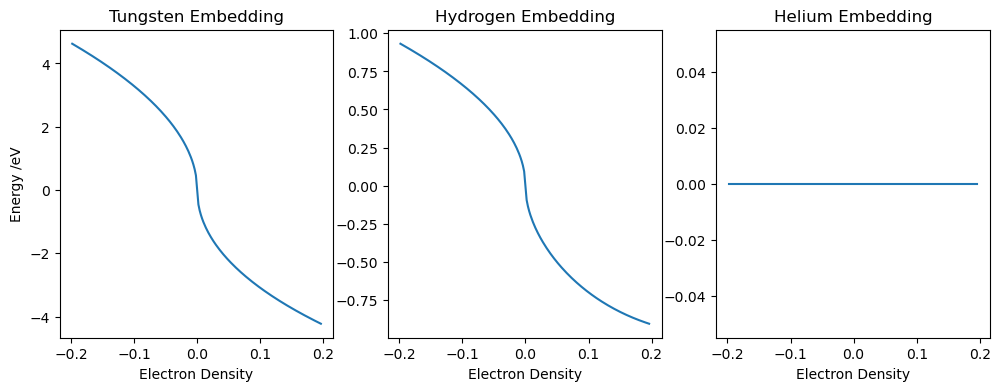

In [4]:
pot, potlines, pot_params = Handle_PotFiles_FS.read_pot('git_folder/Potentials/beck_full.eam.fs')

keys = [
        'W F' , 'W-W p' , 'W-H p' , 'W-He p' ,
        'H F' , 'H-W p' , 'H-H p' , 'H-He p' ,
        'He F', 'He-W p', 'He-H p', 'He-He p',
        'W-W' , 'W-H'   , 'W-He'  , 'H-H'    ,'H-He' , 'He-He'
        ] 

pot_he = {}

for key in pot_fs.keys():
    pot_he[key] = pot_fs[key]

lines = potlines.split('\n')
val = lines[4].split()

Nrho = int(val[0])
drho = float(val[1])
Nr   = int(val[2])
dr   = float(val[3])
cutoff  = float(val[4])
rhomax = (Nrho-1)*drho
rhomin = -500*drho

rho = np.linspace(rhomin, rhomax, Nrho + 500)


Nrho = int(val[0]) + 500
drho = float(val[1])
Nr   = int(val[2])
dr   = float(val[3])
cutoff  = float(val[4])
# rhomax = (Nrho - 500 -1)*drho
rhomin = -500*drho

print(rho[500], drho)

rho = np.linspace(rhomin, rhomax, Nrho)

w_A = 10.39248715
h_A =  2.094997341 

w_F = w_A * np.sqrt(- rho[:500])
h_F = h_A * np.sqrt(- rho[:500])
he_F = np.zeros((500,))

pot_he['W F'] = np.hstack([w_F, pot_he['W F']])
pot_he['H F'] = np.hstack([h_F, pot_he['H F']])
pot_he['He F'] = np.hstack([he_F, pot_he['He F']])

lines[4] = '   %d   %.10f   %d   %.10f   %.10f   %.10f' % (Nrho, drho, Nr, dr, cutoff, rhomax)
potlines = '\n'.join(lines)

Handle_PotFiles_He.write_pot(pot_he, potlines, 'git_folder/Potentials/beck_full.eam.he')

# Create a subplot with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot on the first subplot
axs[0].plot(rho[400:600], pot_he['W F'][400:600])
axs[0].set_title('Tungsten Embedding')
axs[0].set_xlabel('Electron Density')
axs[0].set_ylabel('Energy /eV')


# Plot on the first subplot
axs[1].plot(rho[400:600], pot_he['H F'][400:600])
axs[1].set_title('Hydrogen Embedding')
axs[1].set_xlabel('Electron Density')


# Plot on the first subplot
axs[2].plot(rho[400:600], pot_he['He F'][400:600])
axs[2].set_title('Helium Embedding')
axs[2].set_xlabel('Electron Density')

# Display the plot
plt.show()

In [5]:
pot_he['H F'][490:510]

array([ 0.29473356,  0.27960881,  0.26361771,  0.24659179,  0.22829963,
        0.2084081 ,  0.18640587,  0.16143222,  0.13180886,  0.09320294,
        0.        , -0.09516066, -0.13566973, -0.16714422, -0.19391744,
       -0.21766802, -0.23925699, -0.25919595, -0.27781832, -0.29535576])

In [6]:
# base = np.loadtxt('dft_base.txt')

# he = np.array([ [0, 0, 2, 11.54977906,	0.8],
#                 [0, 0, 3, 16.65966859,	1.16],
#                 [0, 0, 4, 21.42955812,	1.65],
#                 [0, 0, 5, 26.12944765,	2.03]
#             ])

# vhe = np.array([[1, 0, 2, 8.019263827,	-0.06],
#                 [1, 0, 3, 11.00915336,	0.14],
#                 [1, 0, 4, 14.03904289,	0.38],
#                 [1, 0, 5, 18.44893242,	0.71],
#                 [1, 0, 6, 22.55882195,	1.1],
#                 [1, 0, 7, 26.60871148, np.nan],
#                 [1, 0, 8, 30.91860101, np.nan]])


# v2he = np.array([[2, 0, 1 , 8.200709813, np.nan],
#                  [2, 0, 2 , 9.640599343, np.nan], 
#                  [2, 0, 3 , 11.96048887, np.nan],
#                  [2, 0, 4 , 14.65037840, np.nan]
#                  ])

# final = np.vstack([base, he, vhe, v2he])

# unique = np.unique(final, axis=0)


# final = np.hstack( [final[:, :3], np.zeros((len(final), 1)), final[:, 3:]] )

# int_he = np.array([[0, 0, 0, 0, 0, 0],
#                    [0, 0, 1, 1, 6.35988953, np.nan],
#                    [0, 0, 1, 2, 6.50988953, 0.38],
#                    [0, 0, 1, 3, 6.79988953, np.nan]])

# final = np.vstack([final, int_he])

# sort_idx = np.lexsort((final[:, 3],final[:, 2], final[:, 1], final[:, 0]))

# final = final[sort_idx]

# np.savetxt('dft_data_final.txt', final)

In [7]:
# final = np.loadtxt('dft_base_new.txt')

# he = np.array([ [0, 0, 2, 11.54977906,	0.8],
#                 [0, 0, 3, 16.65966859,	1.16],
#                 [0, 0, 4, 21.42955812,	1.65],
#                 [0, 0, 5, 26.12944765,	2.03]
#             ])

# vhe = np.array([[1, 0, 2, 8.019263827,	-0.06],
#                 [1, 0, 3, 11.00915336,	0.14],
#                 [1, 0, 4, 14.03904289,	0.38],
#                 [1, 0, 5, 18.44893242,	0.71],
#                 [1, 0, 6, 22.55882195,	1.1],
#                 [1, 0, 7, 26.60871148, np.nan],
#                 [1, 0, 8, 30.91860101, np.nan]])


# v2he = np.array([[2, 0, 1 , 8.200709813, np.nan],
#                  [2, 0, 2 , 9.640599343, np.nan], 
#                  [2, 0, 3 , 11.96048887, np.nan],
#                  [2, 0, 4 , 14.65037840, np.nan]
#                  ])

# final = np.vstack([base, he, vhe, v2he])

# unique = np.unique(final, axis=0)


# final = np.hstack( [final[:, :3], np.zeros((len(final), 1)), final[:, 3:]] )

# int_he = np.array([[0, 0, 0, 0, 0, 0],
#                    [0, 0, 1, 1, 6.29, np.nan],
#                    [0, 0, 1, 2, 6.44, 0.38],
#                    [0, 0, 1, 3, 6.73, np.nan]])

# final = np.vstack([final, int_he])

# sort_idx = np.lexsort((final[:, 3],final[:, 2], final[:, 1], final[:, 0]))

# final = final[sort_idx]

# np.savetxt('dft_yang.txt', final)